<a href="https://colab.research.google.com/github/zacpepin/Species-Population-Prediction/blob/main/Species_Population_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import copy
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc

Dimensionality reduction used, look into time series analysis, look at logistic regression since data is categorical, and nonlinear regression since independent variables and dependent variable is non-linear

Importing necessary packages for analysis

In [38]:
data_file ="animals_info.csv"
data = pd.read_csv(data_file)

Loading animal population and related features

In [3]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29357 entries, 0 to 29356
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             29357 non-null  object
 1   Kingdom          29357 non-null  object
 2   Phylum           28525 non-null  object
 3   Subphylum        10752 non-null  object
 4   Class            29357 non-null  object
 5   Order            28920 non-null  object
 6   Suborder         2960 non-null   object
 7   Family           29354 non-null  object
 8   Genus            29351 non-null  object
 9   Species          29357 non-null  object
 10  Population size  1806 non-null   object
 11  Life span        1862 non-null   object
 12  Top speed        595 non-null    object
 13  Weight           2873 non-null   object
 14  Height           336 non-null    object
 15  Length           2947 non-null   object
 16  Attributes       29357 non-null  object
 17  Distribution     29357 non-null

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,...,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,...,96 km/h,65-306 kg,NaN,200-390 cm,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,...,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,...,20 km/h,100-160 t,NaN,25-30 m,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,...,45 km/h,3-6 t,NaN,6-9 m,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29352,Sulphur-bearded reedhaunter,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Furnariidae,Cranioleuca,Limnoctites sulphuriferus,...,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29353,Jackson's pipit,African pipit,NaN,NaN,Animalia,Chordata,NaN,Aves,Passeriformes,Motacillidae,...,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29354,Gabon forest robin,Forest robin,NaN,NaN,Animalia,Chordata,NaN,Aves,Passeriformes,Muscicapidae,...,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29355,McConnell's spinetail,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Furnariidae,Synallaxis,Synallaxis macconnelli,...,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Stable', 'Population sta..."


Viewing data and gaining a better understanding of the whole table.

(array([4., 0., 0., 0., 0., 0., 1., 0., 0., 8.]), array([3.00000e+00, 2.90480e+03, 5.80660e+03, 8.70840e+03, 1.16102e+04,
       1.45120e+04, 1.74138e+04, 2.03156e+04, 2.32174e+04, 2.61192e+04,
       2.90210e+04]), <BarContainer object of 10 artists>)


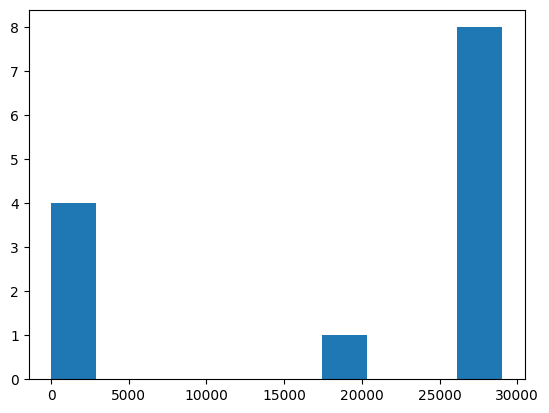

In [4]:
null_counts=data.isnull().sum()
null_counts=null_counts[null_counts>0]
histogram=plt.hist(null_counts)
print(histogram)

In [5]:
null_counts

Phylum               832
Subphylum          18605
Order                437
Suborder           26397
Family                 3
Genus                  6
Population size    27551
Life span          27495
Top speed          28762
Weight             26484
Height             29021
Length             26410
Diet               26713
dtype: int64

In [6]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
nulldemo

,0
0,NaN
1,None
2,[]
3,{}
4,NaN
5,Null
6,NULL
7,None
8,NA
9,?


In [7]:
for attr in data.columns:
    string_null = np.array([attr in a[2:] for attr in data[attr]])
    print(attr, data[attr].isnull().sum(), string_null.sum())

Name 0 0
Kingdom 0 0
Phylum 832 0
Subphylum 18605 0
Class 0 0
Order 437 0
Suborder 26397 0
Family 3 0
Genus 6 0
Species 0 0
Population size 27551 0
Life span 27495 0
Top speed 28762 0
Weight 26484 0
Height 29021 0
Length 26410 0
Attributes 0 0
Distribution 0 0
Habits 0 0
Diet 26713 0
Mating_Habits 0 0
Population 0 0


Above four cells are designed to identifiy the NA, NULL values. Provide a number to each column's NA/NULL count

In [39]:
encoder=LabelEncoder()
data['Name'] = encoder.fit_transform(data['Name'])
data['Kingdom'] = encoder.fit_transform(data['Kingdom'])
data['Phylum'] = encoder.fit_transform(data['Phylum'])
data['Subphylum'] = encoder.fit_transform(data['Subphylum'])
data['Class'] = encoder.fit_transform(data['Class'])
data['Order'] = encoder.fit_transform(data['Order'])
data['Suborder'] = encoder.fit_transform(data['Suborder'])
data['Family'] = encoder.fit_transform(data['Family'])
data['Genus'] = encoder.fit_transform(data['Genus'])
data['Species'] = encoder.fit_transform(data['Species'])
data['Population size'] = encoder.fit_transform(data['Population size'])
data['Life span'] = encoder.fit_transform(data['Life span'])
data['Top speed'] = encoder.fit_transform(data['Top speed'])
data['Weight'] = encoder.fit_transform(data['Weight'])
data['Height'] = encoder.fit_transform(data['Height'])
data['Length'] = encoder.fit_transform(data['Length'])
data['Attributes'] = encoder.fit_transform(data['Attributes'])
data['Distribution'] = encoder.fit_transform(data['Distribution'])
data['Habits'] = encoder.fit_transform(data['Habits'])
data['Diet'] = encoder.fit_transform(data['Diet'])
data['Mating_Habits'] = encoder.fit_transform(data['Mating_Habits'])
data['Population'] = encoder.fit_transform(data['Population'])

Encoding classification data to numbers to use for analysis

In [9]:
data.head(50)


,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,11811,17,0,1,7,18,1,129,910,4304,...,114,568,226,156,2309,3384,1065,73,544,29
1,26438,17,0,1,7,18,3,316,4184,19588,...,131,1878,254,728,2046,3185,1653,8,1518,11
2,4330,17,0,1,7,18,1,829,6016,27964,...,90,269,196,54,387,3382,1262,253,1337,29
3,3588,17,0,1,7,11,16,78,599,2924,...,38,252,254,878,92,2029,1147,57,872,20
4,14319,17,0,1,7,11,16,249,4044,19059,...,77,1097,254,1662,405,2025,1138,8,1173,1
5,10815,17,0,1,7,18,1,829,150,698,...,58,1971,167,36,361,3049,1259,151,1491,24
6,15346,17,0,1,7,18,3,316,4184,19585,...,90,375,254,411,2446,1994,1184,305,1751,16
7,14412,17,0,1,7,37,16,598,4389,20376,...,5,1365,166,2122,2711,5597,1452,151,1417,16
8,7482,17,0,1,7,18,3,316,4917,23063,...,77,1059,167,641,2322,7715,1839,9,1747,13
9,21470,17,0,1,7,37,16,442,5328,24862,...,58,756,254,1274,2727,5650,430,157,1037,16


In [10]:
data[np.isnan(data)] = np.nanmean(data)
data


,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,11811,17,0,1,7,18,1,129,910,4304,...,114,568,226,156,2309,3384,1065,73,544,29
1,26438,17,0,1,7,18,3,316,4184,19588,...,131,1878,254,728,2046,3185,1653,8,1518,11
2,4330,17,0,1,7,18,1,829,6016,27964,...,90,269,196,54,387,3382,1262,253,1337,29
3,3588,17,0,1,7,11,16,78,599,2924,...,38,252,254,878,92,2029,1147,57,872,20
4,14319,17,0,1,7,11,16,249,4044,19059,...,77,1097,254,1662,405,2025,1138,8,1173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29352,25610,17,0,2,2,80,16,323,1437,14727,...,138,2255,254,2122,3090,6017,2081,308,2712,13
29353,13867,8,2,2,1,24,16,74,4271,17222,...,138,2255,254,2122,3132,8005,2178,308,2712,40
29354,10605,148,2,2,1,24,16,74,4271,17345,...,138,2255,254,2122,3132,8005,2178,308,2712,40
29355,16685,17,0,2,2,80,16,323,5588,26033,...,138,2255,254,2122,3100,6342,2178,308,2712,29


In [11]:
for attr in data.columns:
    string_null = np.array([attr in a[2:] for attr in data[attr]])
    print(attr, data[attr].isnull().sum(), string_null.sum())

Name 0 0
Kingdom 0 0
Phylum 0 0
Subphylum 0 0
Class 0 0
Order 0 0
Suborder 0 0
Family 0 0
Genus 0 0
Species 0 0
Population size 0 0
Life span 0 0
Top speed 0 0
Weight 0 0
Height 0 0
Length 0 0
Attributes 0 0
Distribution 0 0
Habits 0 0
Diet 0 0
Mating_Habits 0 0
Population 0 0


Removing all NA/NULL values and replacing all NA/NULL values with the mean value.

In [12]:
matrix= data.corr()
print(matrix)
matrix.info()

                     Name   Kingdom    Phylum  Subphylum     Class     Order  \
Name             1.000000  0.006806 -0.063811  -0.005213 -0.045611  0.019941   
Kingdom          0.006806  1.000000  0.540387  -0.282025 -0.029731  0.098786   
Phylum          -0.063811  0.540387  1.000000   0.016861  0.107479  0.200313   
Subphylum       -0.005213 -0.282025  0.016861   1.000000 -0.753403 -0.332285   
Class           -0.045611 -0.029731  0.107479  -0.753403  1.000000  0.504658   
Order            0.019941  0.098786  0.200313  -0.332285  0.504658  1.000000   
Suborder         0.007287 -0.119274 -0.012793   0.325678 -0.240384 -0.102297   
Family           0.101410 -0.073709 -0.053256   0.003762  0.023571  0.166710   
Genus            0.326592 -0.016405 -0.061222  -0.027696 -0.005743  0.052986   
Species          0.332661 -0.018284 -0.068458  -0.020474 -0.009663  0.041389   
Population size  0.009682  0.022087  0.075978   0.031641 -0.005713  0.080653   
Life span        0.007845  0.032642  0.1

Building a matrix to see the correlation/relationships among the columns.

<Axes: >

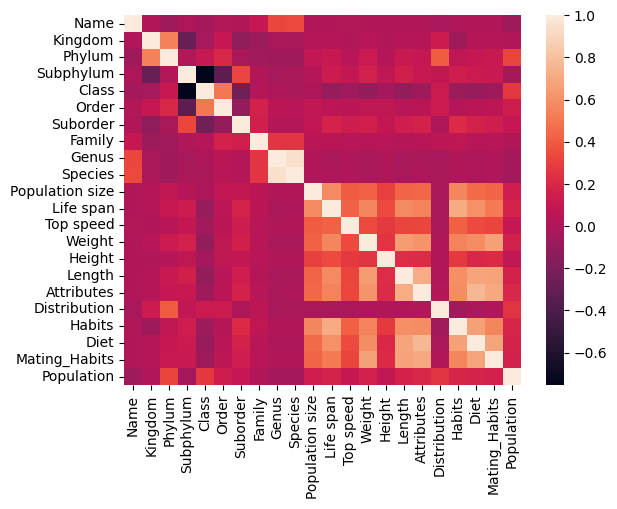

In [13]:
sns.heatmap(matrix)

Taking the matrix and creating a heatmap to visualize the correlations/relationships among the columns

In [14]:
data_half= data.iloc[::2]
data_half

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,11811,17,0,1,7,18,1,129,910,4304,...,114,568,226,156,2309,3384,1065,73,544,29
2,4330,17,0,1,7,18,1,829,6016,27964,...,90,269,196,54,387,3382,1262,253,1337,29
4,14319,17,0,1,7,11,16,249,4044,19059,...,77,1097,254,1662,405,2025,1138,8,1173,1
6,15346,17,0,1,7,18,3,316,4184,19585,...,90,375,254,411,2446,1994,1184,305,1751,16
8,7482,17,0,1,7,18,3,316,4917,23063,...,77,1059,167,641,2322,7715,1839,9,1747,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29348,22711,17,0,2,2,80,16,784,1959,9799,...,138,2255,254,2122,3100,6900,2178,308,2712,29
29350,8214,17,0,2,2,80,16,323,1231,5537,...,138,2255,254,2122,3090,5749,2178,308,2712,13
29352,25610,17,0,2,2,80,16,323,1437,14727,...,138,2255,254,2122,3090,6017,2081,308,2712,13
29354,10605,148,2,2,1,24,16,74,4271,17345,...,138,2255,254,2122,3132,8005,2178,308,2712,40


In [15]:
#sns.pairplot(data_half)

Had to select every other row due to large size of data, but seleced so that it was still an accurate represenattion of original data. Used the data half to create pairplots and create more visuals to understand the relationships/correlations among the columns.

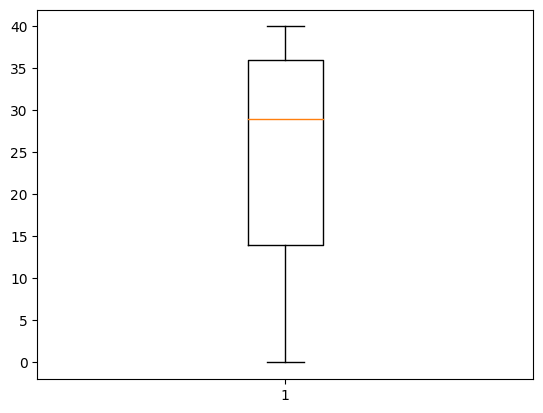

In [16]:
plt.boxplot(data["Population"])
plt.show()

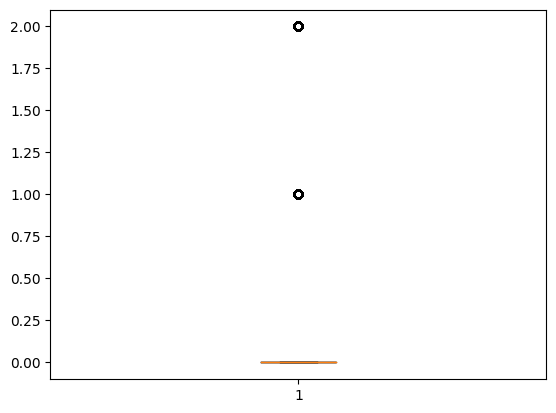

In [17]:
plt.boxplot(data["Phylum"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

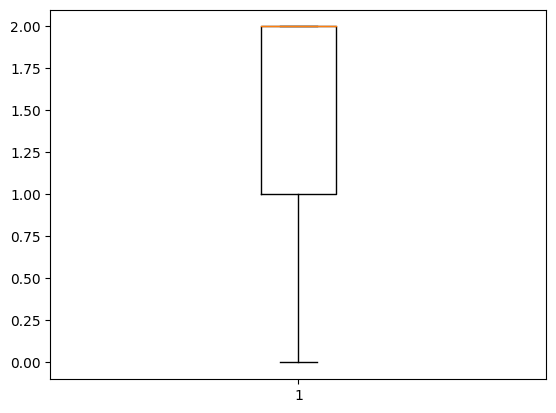

In [18]:
plt.boxplot(data["Subphylum"])
plt.show

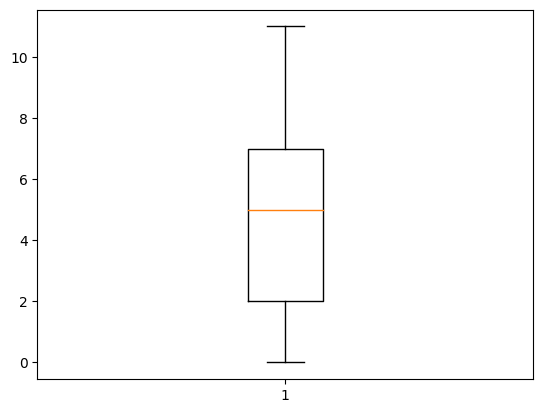

In [19]:
plt.boxplot(data["Class"])
plt.show()

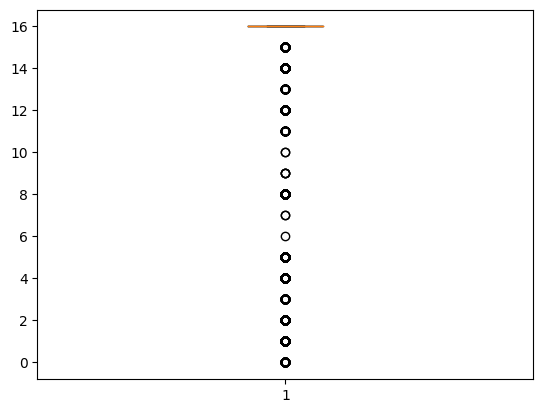

In [20]:
plt.boxplot(data["Suborder"])
plt.show()

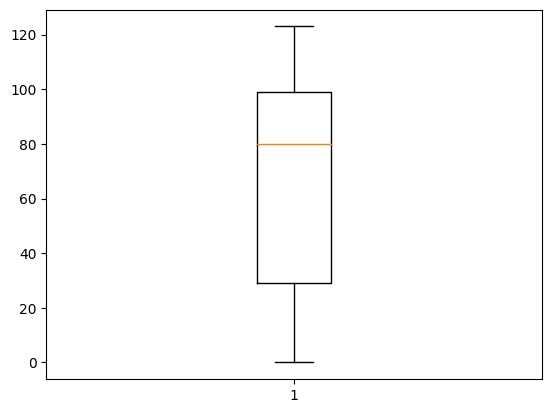

In [21]:
plt.boxplot(data["Order"])
plt.show()

Based on later code, found that the above six columns have the largest impact on predicting Population. Wanted to visualize each with a box plot to see the spread of data.

Next step in project: Create classification models and regression models to understand the strength of all columns and single out the columns that have a stronger predictivability towards the animals population.

In [22]:
X = data.drop('Population',axis=1)
y = data['Population']
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit the model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


R-squared: 0.15728065026859928
Accuracy: 0.5085149863760218
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55        16
           1       0.40      0.17      0.24        23
           2       0.10      0.10      0.10        20
           3       0.59      0.33      0.43        48
           4       0.00      0.00      0.00         2
           5       0.38      0.15      0.22        67
           6       0.33      0.33      0.33        12
           7       0.12      0.10      0.11        10
           8       0.06      0.06      0.06        17
           9       0.26      0.22      0.24       130
          10       0.08      0.05      0.06        20
          11       0.15      0.18      0.16       231
          13       0.39      0.41      0.40       761
          14       0.12      0.06      0.08       227
          15       0.00      0.00      0.00         0
          16       0.17      0.10      0.12       2

First classifier uses a Decision Tree Classifier to model the data. Output provides the accuracy and classification report of this model.

In [23]:
X = data[['Distribution','Phylum','Class']]
y = data['Population']
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit the model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=0)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

R-squared: 0.025901193690793245
Accuracy: 0.4664509536784741
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.33      0.22      0.26        23
           2       0.00      0.00      0.00        20
           3       0.76      0.33      0.46        48
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        67
           6       1.00      0.08      0.15        12
           7       0.00      0.00      0.00        10
           8       0.24      0.24      0.24        17
           9       0.42      0.13      0.20       130
          10       0.00      0.00      0.00        20
          11       0.11      0.10      0.10       231
          13       0.31      0.30      0.30       761
          14       0.13      0.03      0.04       227
          16       0.14      0.02      0.03       299
          18       0.00      0.00      0.00       

Second classifier uses a Decision Tree Classifier to model the data. With the adjustment of using only the Distribution, Phylum, and Class columns to predict Population. Output provides the accuracy and classification report of this model.
The columns were picked based on the heatmap and matrix, with these three columns having the largest R values with the Population column

In [24]:
X = data.drop('Population',axis=1)
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit the model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


R-squared: -0.007137215505702343
Accuracy: 0.43920299727520434
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.25      0.32        16
           1       0.32      0.26      0.29        23
           2       0.06      0.05      0.05        20
           3       0.50      0.44      0.47        48
           4       0.00      0.00      0.00         2
           5       0.12      0.10      0.11        67
           6       0.18      0.25      0.21        12
           7       0.57      0.40      0.47        10
           8       0.20      0.24      0.22        17
           9       0.23      0.23      0.23       130
          10       0.07      0.10      0.08        20
          11       0.11      0.15      0.13       231
          13       0.33      0.33      0.33       761
          14       0.09      0.10      0.09       227
          15       0.00      0.00      0.00         0
          16       0.14      0.14      0.14     

In [25]:
X = data[['Phylum','Class','Distribution']]
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit the model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

R-squared: -0.005918150490396901
Accuracy: 0.4592983651226158
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.25      0.26      0.26        23
           2       0.00      0.00      0.00        20
           3       0.68      0.35      0.47        48
           4       0.00      0.00      0.00         2
           5       0.27      0.10      0.15        67
           6       0.33      0.08      0.13        12
           7       0.36      0.40      0.38        10
           8       0.16      0.24      0.19        17
           9       0.25      0.15      0.19       130
          10       0.00      0.00      0.00        20
          11       0.12      0.17      0.14       231
          13       0.32      0.43      0.36       761
          14       0.09      0.04      0.06       227
          16       0.14      0.05      0.08       299
          18       0.00      0.00      0.00      

Above two models still use the Decision Tree Classifer, however I adjusted the code to not include the one hot encoder and did not fit the data to that encoder. With the non-adjusted data wanted to see the impact of all columns against Population and the three specific columns against Population.

In [26]:
X = data[['Name',
'Kingdom',
'Phylum',
'Subphylum',
'Class',
'Order',
'Suborder',
'Family',
'Genus',
'Species',
'Population size',
'Life span',
'Top speed',
'Weight',
'Height',
'Length',
'Attributes',
'Distribution',
'Habits',
'Diet']]
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get the coefficients of the linear regression model
coefficients = model.coef_

# Display the coefficients and their corresponding features
for feature, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {feature}: {coef}")

Mean Squared Error: 95.3404624047352
R-squared: 0.24754092931142335
Coefficient for Name: -2.0882096265586253e-05
Coefficient for Kingdom: -0.01541990792439487
Coefficient for Phylum: 5.906493480084852
Coefficient for Subphylum: 4.052139054286379
Coefficient for Class: 1.7123734890877214
Coefficient for Order: -0.025384535589386126
Coefficient for Suborder: 0.37209124318970793
Coefficient for Family: -0.0005165966792676017
Coefficient for Genus: -0.00019572722648978055
Coefficient for Species: 3.618594144582281e-05
Coefficient for Population size: 0.0006997206034200449
Coefficient for Life span: 0.005818545545593025
Coefficient for Top speed: 0.007813170889932114
Coefficient for Weight: 0.0003607678817015489
Coefficient for Height: 0.012442356312661705
Coefficient for Length: 0.0008018537894454257
Coefficient for Attributes: 0.0013814756045902636
Coefficient for Distribution: 0.00034294783679804705
Coefficient for Habits: 0.0015806572899325188
Coefficient for Diet: 0.00163435235547992


Next model in the project uses a linear regression analysis. Using all columns to see the predictive ability of the species Population. Using the model, provided the mean square error and R squared value. As well as each coefficent for each column.

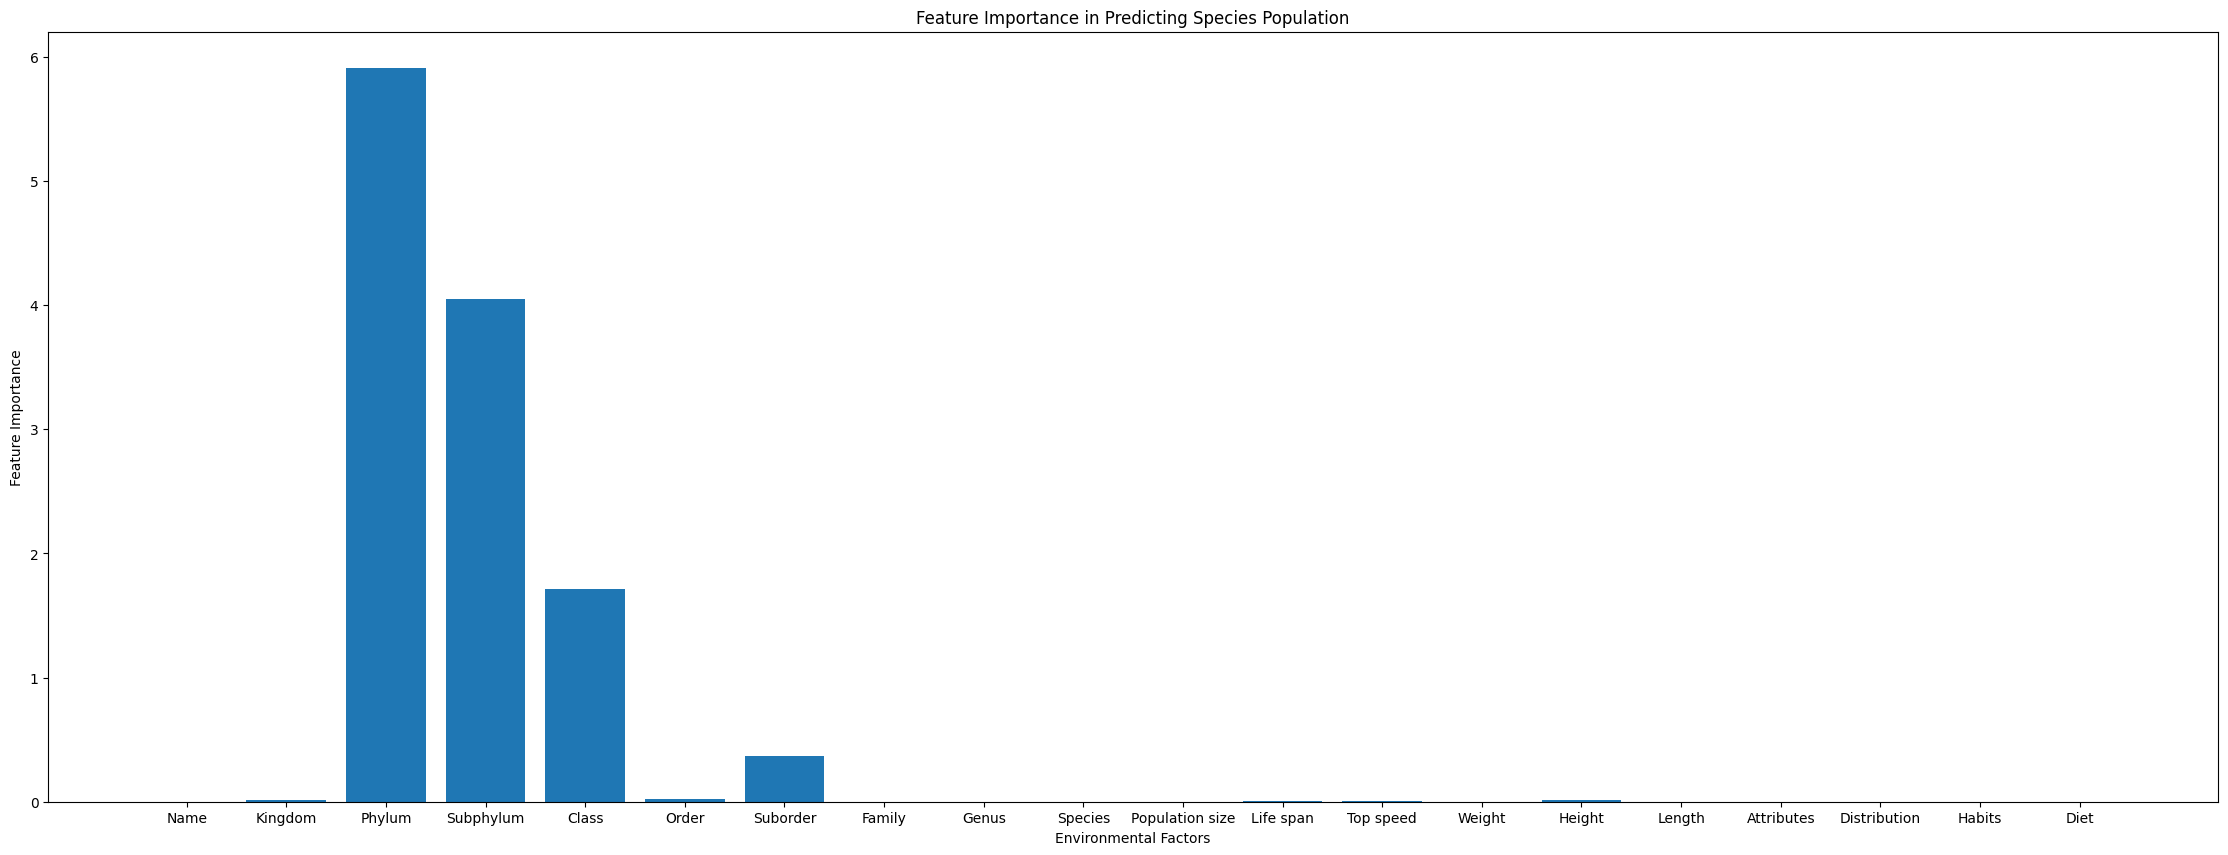

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     520.0
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:32:37   Log-Likelihood:            -1.0833e+05
No. Observations:               29357   AIC:                         2.167e+05
Df Residuals:                   29336   BIC:                         2.169e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.4641      1.226     

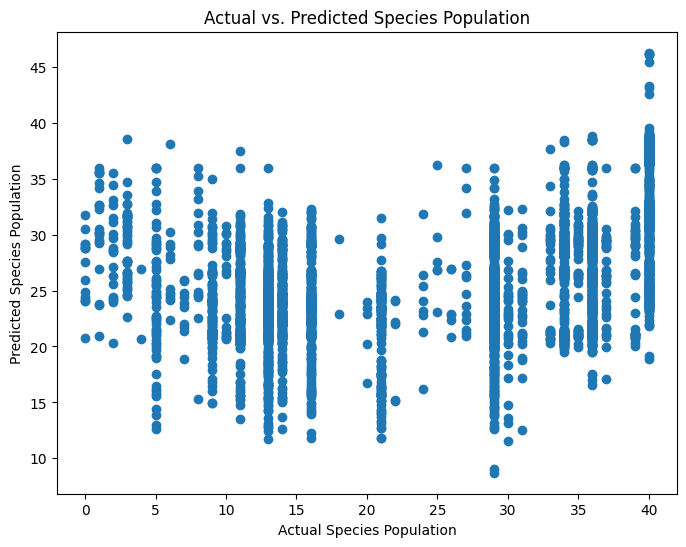

In [27]:
feature_importance = np.abs(coefficients)

# Visualize feature importance
plt.figure(figsize=(28,10))
plt.bar(X.columns, feature_importance)
plt.xlabel('Environmental Factors')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Predicting Species Population')
plt.show()

# You can also perform statistical tests to determine the significance of each feature's correlation with species population growth.
# For example, you can use the statsmodels library for hypothesis testing.
# Here's a simple example using ordinary least squares (OLS) regression with statsmodels:

import statsmodels.api as sm

X_with_constant = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_constant).fit()

# Get summary statistics of the OLS model
print(ols_model.summary())

# The summary statistics will provide p-values for each feature, indicating their significance in predicting the species population.

# You can further refine the model by selecting the most significant features based on p-values and feature importance.

# Additionally, you can visualize the actual vs. predicted values on a scatter plot to see how well the model performs:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Species Population')
plt.ylabel('Predicted Species Population')
plt.title('Actual vs. Predicted Species Population')
plt.show()

Using the linear regression model, visualizing it with a bar graph and each features importance in the predicitve analysis of Population. Additionally producing a OLS Regression Results page for the model and one more graph visualiing the actual vs. predicting species population based on the model and orignianl data.

In [28]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [-0.05108936  0.1086609   0.2217382   0.37065563 -0.11758682]
Mean Cross-Validation Score: 0.10647570674131848


Finally usinf the linear regression model and checking its Cross-Validation score and mean CV score.

Mean Squared Error: 102.42320735045536
R-squared: 0.19164151844894672
Coefficient for Class: 1.8274008083355635
Coefficient for Subphylum: 6.92888147984057
Coefficient for Phylum: 6.237949884720193


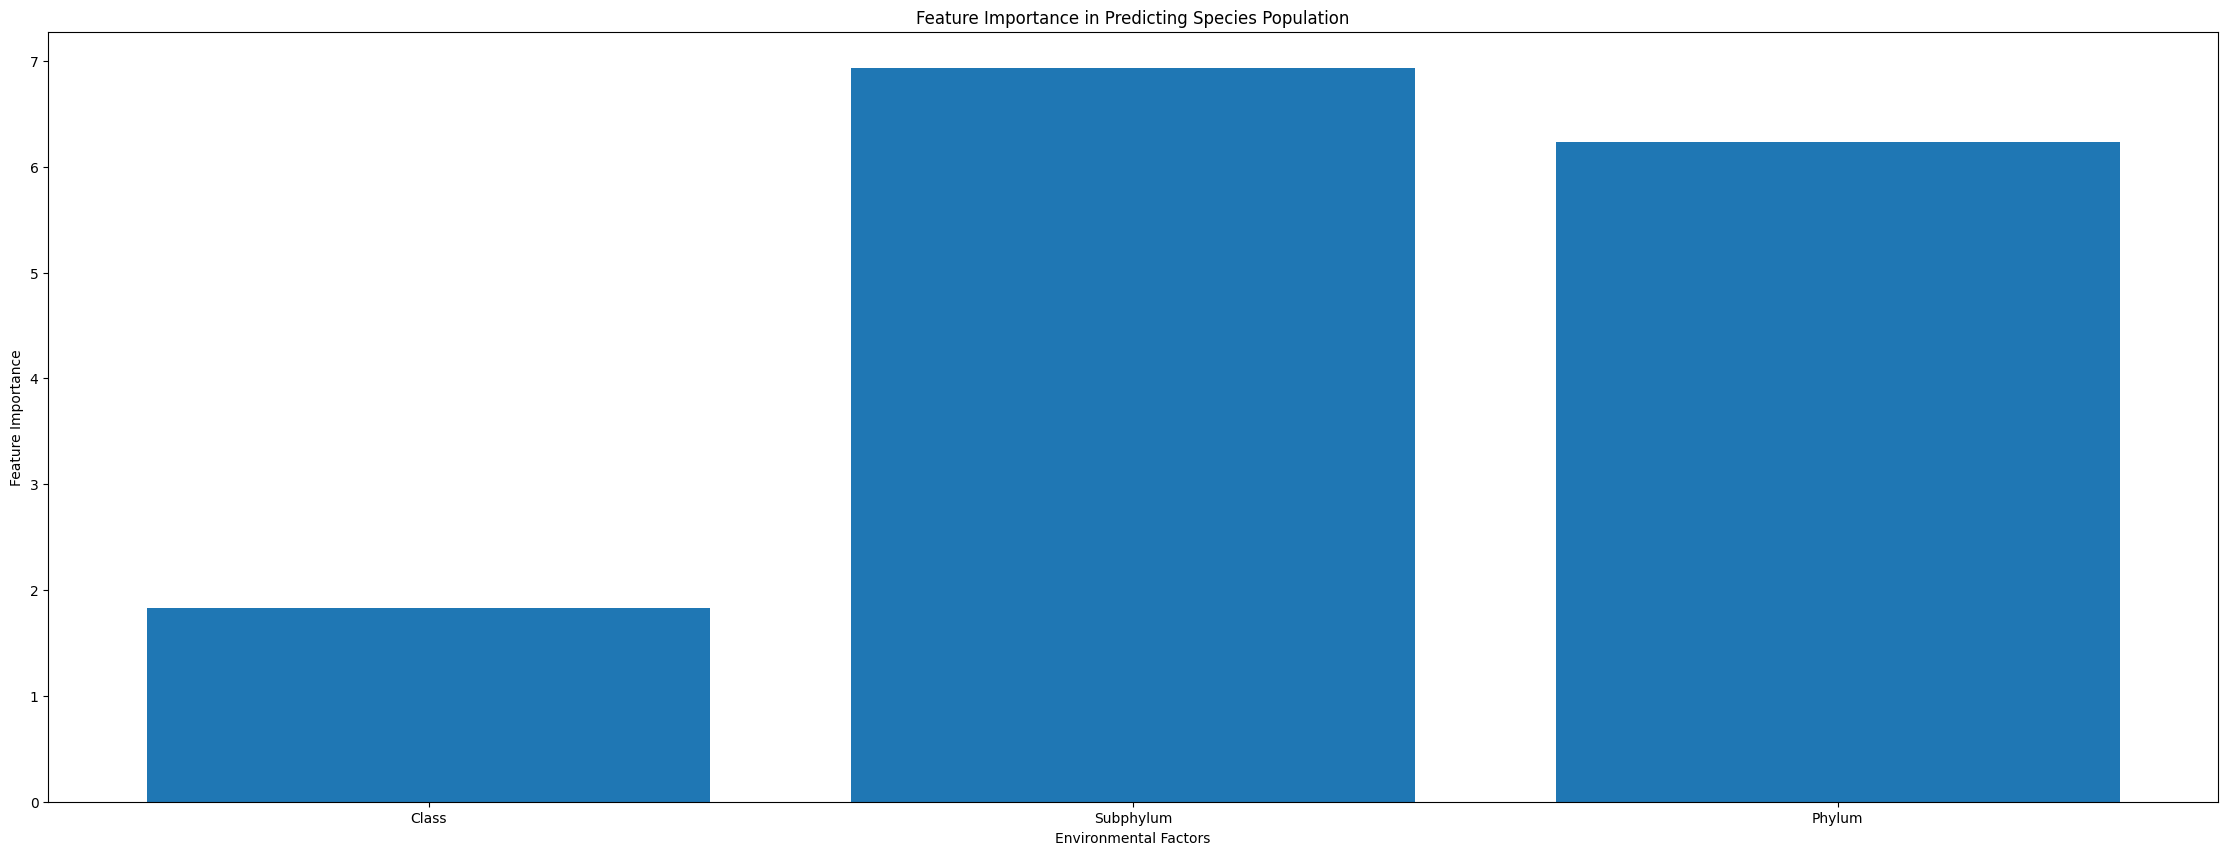

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2495.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:            -1.0945e+05
No. Observations:               29357   AIC:                         2.189e+05
Df Residuals:                   29353   BIC:                         2.189e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9713      0.388     15.381      0.0

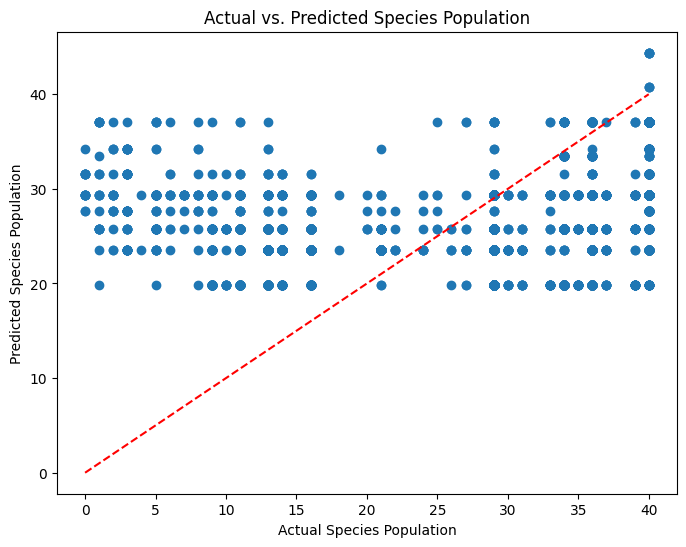

Cross-Validation Scores: [-0.06150775  0.01532777  0.14620335  0.37605608 -0.06734989]
Mean Cross-Validation Score: 0.08174591259423736


In [77]:
X = data[['Class','Subphylum','Phylum']]
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get the coefficients of the linear regression model
coefficients = model.coef_

# Display the coefficients and their corresponding features
for feature, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {feature}: {coef}")
feature_importance = np.abs(coefficients)

# Visualize feature importance
plt.figure(figsize=(28,10))
plt.bar(X.columns, feature_importance)
plt.xlabel('Environmental Factors')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Predicting Species Population')
plt.show()

# You can also perform statistical tests to determine the significance of each feature's correlation with species population growth.
# For example, you can use the statsmodels library for hypothesis testing.
# Here's a simple example using ordinary least squares (OLS) regression with statsmodels:

import statsmodels.api as sm

X_with_constant = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_constant).fit()

# Get summary statistics of the OLS model
print(ols_model.summary())

# The summary statistics will provide p-values for each feature, indicating their significance in predicting the species population.

# You can further refine the model by selecting the most significant features based on p-values and feature importance.

# Additionally, you can visualize the actual vs. predicted values on a scatter plot to see how well the model performs:
plt.figure(figsize=(8, 6))

plt.scatter(y_test,y_pred)
plt.plot([0, np.max(y)], [0, np.max(y)], color='red', linestyle='--')
plt.xlabel('Actual Species Population')
plt.ylabel('Predicted Species Population')
plt.title('Actual vs. Predicted Species Population')
plt.show()
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Squared Error: 107.06258073629951
R-squared: 0.155026019651909
Coefficient for Phylum: 5.753297343283549
Coefficient for Class: 0.8649954609651057
Coefficient for Distribution: 0.00043097249781443026


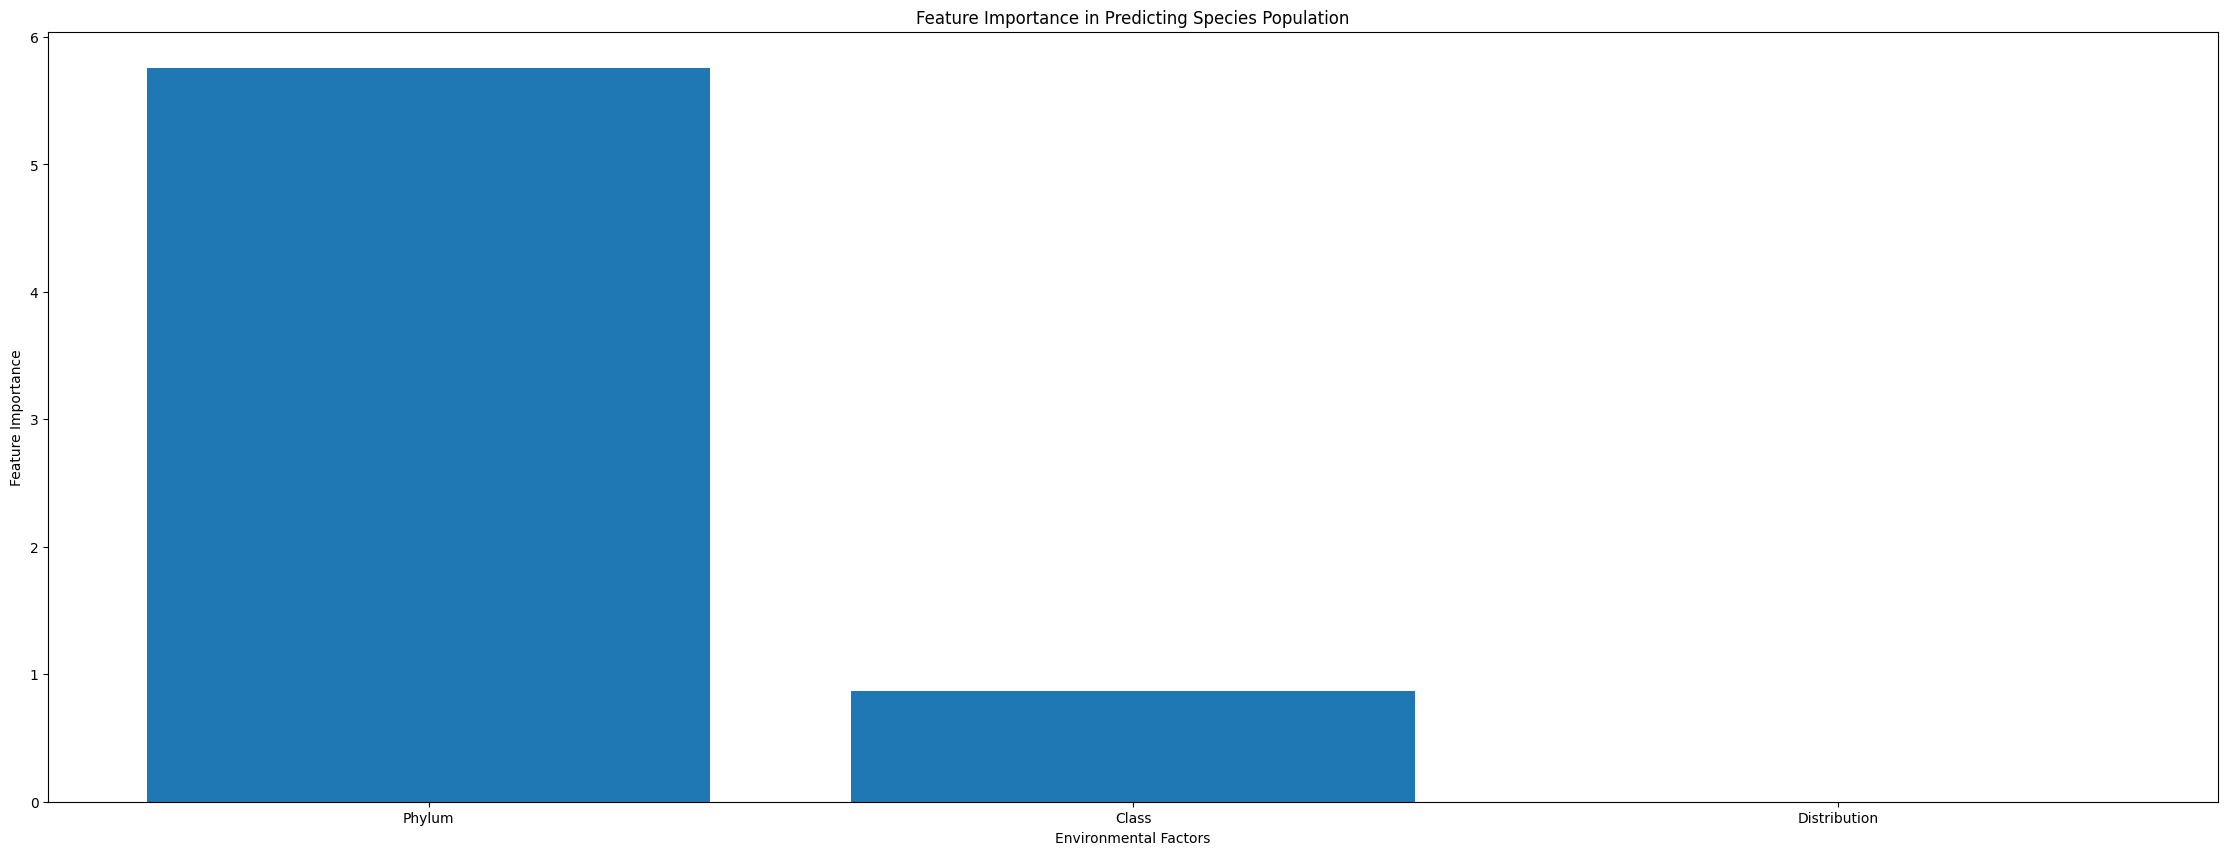

                                 OLS Regression Results                                
Dep. Variable:             Population   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                          3.082e+04
Date:                Fri, 11 Aug 2023   Prob (F-statistic):                        0.00
Time:                        21:45:35   Log-Likelihood:                     -1.1962e+05
No. Observations:               29357   AIC:                                  2.392e+05
Df Residuals:                   29354   BIC:                                  2.393e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

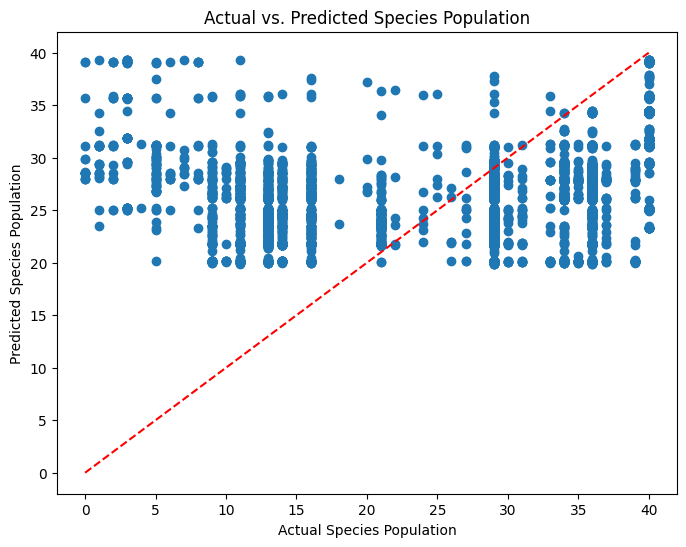

Cross-Validation Scores: [-0.24294402  0.05035041  0.04596362  0.3394214  -0.09206844]
Mean Cross-Validation Score: 0.020144596672187022


In [78]:
X = data[['Phylum','Class','Distribution']]
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get the coefficients of the linear regression model
coefficients = model.coef_

# Display the coefficients and their corresponding features
for feature, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {feature}: {coef}")
feature_importance = np.abs(coefficients)

# Visualize feature importance
plt.figure(figsize=(28,10))
plt.bar(X.columns, feature_importance)
plt.xlabel('Environmental Factors')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Predicting Species Population')
plt.show()

# You can also perform statistical tests to determine the significance of each feature's correlation with species population growth.
# For example, you can use the statsmodels library for hypothesis testing.
# Here's a simple example using ordinary least squares (OLS) regression with statsmodels:

import statsmodels.api as sm

ols_model = sm.OLS(y, X).fit()

# Get summary statistics of the OLS model
print(ols_model.summary())

# The summary statistics will provide p-values for each feature, indicating their significance in predicting the species population.

# You can further refine the model by selecting the most significant features based on p-values and feature importance.

# Additionally, you can visualize the actual vs. predicted values on a scatter plot to see how well the model performs:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, np.max(y)], [0, np.max(y)], color='red', linestyle='--')
plt.xlabel('Actual Species Population')
plt.ylabel('Predicted Species Population')
plt.title('Actual vs. Predicted Species Population')
plt.show()
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

After the first version of the linear regression model using all columns to predcice the Population. Based on the features importance graph, found that Phylum, Subphylum, Class, Suborder were the most important features against the rest. Using those selected columns create a new linear regression model and conducted the same analysis as above. Producing the visuals and score outputs.

R-squared: -0.003877863066765741
Accuracy: 0.3702316076294278
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        67
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00       130
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00       231
          13       0.00      0.00      0.00       761
          14       0.00      0.00      0.00       227
          16       0.00      0.00      0.00       299
          18       0.00      0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


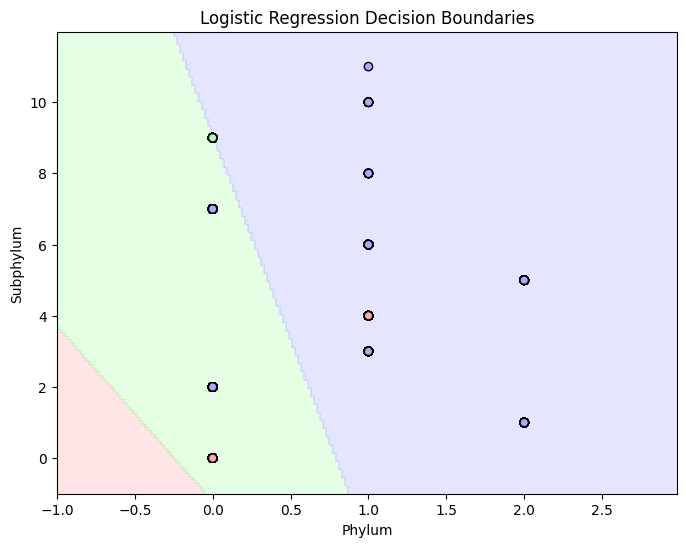

In [31]:
X = data[['Phylum','Class']]
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model and fit the model
model = LogisticRegression(multi_class='multinomial',solver = 'newton-cg',random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert numerical predictions back to original target categories
y_pred_categories = encoder.inverse_transform(y_pred)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


# Create a mesh grid to plot decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(8, 6))
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap, edgecolors='k')
plt.xlabel('Phylum')
plt.ylabel('Subphylum')
plt.title('Logistic Regression Decision Boundaries')
plt.show()

Training RMSE: 10.278839448001413
Testing RMSE: 10.277215506934445
Training MSE: 105.65454039779
Testing MSE: 105.62115857597382
Train R2 0.17012640649079558
Test R2 0.16640220927666916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


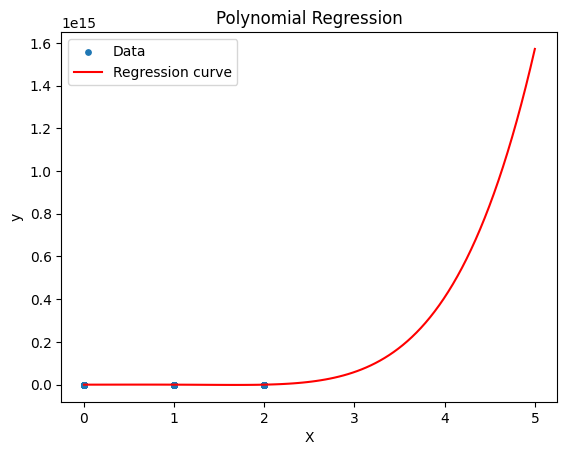

In [32]:
X = data[['Phylum']]
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features up to degree 5
degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model's performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print('Train R2', r2_train)
print('Test R2', r2_test)
# Plot the data and regression curve
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X, y, s=15, label="Data")
plt.plot(X_plot, y_plot, color='r', label="Regression curve")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

In [33]:
X = data.drop('Population',axis=1)
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier and fit the model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)



# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

R-squared: 0.1395202036178328
Accuracy: 0.5102179836512262
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.36      0.17      0.24        23
           2       0.21      0.15      0.18        20
           3       0.62      0.42      0.50        48
           4       0.00      0.00      0.00         2
           5       0.30      0.13      0.19        67
           6       0.40      0.33      0.36        12
           7       0.43      0.30      0.35        10
           8       0.18      0.12      0.14        17
           9       0.29      0.20      0.24       130
          10       0.06      0.05      0.05        20
          11       0.14      0.13      0.14       231
          13       0.40      0.43      0.42       761
          14       0.12      0.06      0.08       227
          15       0.00      0.00      0.00         0
          16       0.19      0.10      0.13       29

In [34]:
X = data[['Phylum','Class','Distribution']]
y = data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier and fit the model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)



# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

R-squared: 0.02033408531880332
Accuracy: 0.4599795640326976
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.22      0.17      0.20        23
           2       0.00      0.00      0.00        20
           3       0.65      0.35      0.46        48
           4       0.00      0.00      0.00         2
           5       0.31      0.12      0.17        67
           6       0.23      0.25      0.24        12
           7       0.40      0.40      0.40        10
           8       0.16      0.24      0.19        17
           9       0.24      0.12      0.16       130
          10       0.00      0.00      0.00        20
          11       0.12      0.14      0.13       231
          13       0.32      0.41      0.36       761
          14       0.08      0.04      0.05       227
          16       0.16      0.06      0.09       299
          18       0.00      0.00      0.00        

Next classification model used was a Random Forest Classifier to see the predicitve abaility of all columns against Population. Creating this model allows for a better understanding of which model has a stronger ability to predict Species Populaton based on all or selected freatures. By comparing and constrasting the R-squared values.

Once RF Classifier is built, code produces a classificaiton report and the accuracy score of the model.

Last Model. Finally adjusted the features for the strongest importance based on above code. Implemented these features and modeled the data again using the RF classifier.

Producing classificaiton report and the accuracy score of the model.

In [35]:
data['Population'] = encoder.inverse_transform(data['Population'])


In [36]:
data['Population'].head(40)

0     {'Population trend': 'Stable', 'Population sta...
1     {'Population trend': 'Decreasing', 'Population...
2     {'Population trend': 'Stable', 'Population sta...
3     {'Population trend': 'Increasing', 'Population...
4          {'Population status': 'Data deficient (DD)'}
5     {'Population trend': 'Increasing', 'Population...
6     {'Population trend': 'Decreasing', 'Population...
7     {'Population trend': 'Decreasing', 'Population...
8     {'Population trend': 'Decreasing', 'Population...
9     {'Population trend': 'Decreasing', 'Population...
10    {'Population trend': 'Decreasing', 'Population...
11                                                   {}
12    {'Population trend': 'Increasing', 'Population...
13             {'Population status': 'Vulnerable (VU)'}
14    {'Population trend': 'Decreasing', 'Population...
15    {'Population trend': 'Decreasing', 'Population...
16    {'Population trend': 'Increasing', 'Population...
17    {'Population trend': 'Stable', 'Population